In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler # To scale raw data
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [3]:
rain = pd.read_csv('Regional_Avg_Rain_MONTH.csv')

In [4]:
rain.head()

,Date,Year,Month,Brandenburg/Berlin,Brandenburg,Baden-Wüerttemberg,Bavaria,Hesse,Mecklenburg-Western Pomerania,LowerSaxony,LowerSaxony/Hamburg/Bremen,North Rhine-Westphalia,Rhineland-Palatinate,Schleswig-Holstein,Saarland,Saxony,Saxony-Anhalt,Thuringia/Saxony-Anhalt,Thuringia,Germany
0,1881-01-01,1881,1,20.400,20.300,36.200,22.500,33.200,16.800,35.100,34.900,40.600,39.300,21.500,52.800,21.800,23.500,25.000,26.800,28.700
1,1881-02-01,1881,2,24.200,24.100,56.700,39.400,56.000,21.700,43.900,43.800,68.200,63.700,30.500,77.000,34.700,29.000,36.500,46.000,43.700
2,1881-03-01,1881,3,60.700,60.700,84.600,89.000,99.500,43.200,91.300,90.900,124.700,95.400,55.400,101.400,101.500,74.400,84.600,97.500,86.600
3,1881-04-01,1881,4,8.800,8.800,64.600,52.400,26.200,5.200,11.900,11.800,28.400,41.900,7.700,48.400,26.300,11.100,18.300,27.400,30.100
4,1881-05-01,1881,5,31.300,31.300,61.500,95.000,31.100,16.300,25.800,25.800,31.900,38.000,30.000,36.700,57.900,30.400,33.800,38.000,47.300


In [5]:
X = rain[["Year", "Month"]].to_numpy().astype(np.float32)
y = rain["Germany"].to_numpy().astype(np.float32)
scaler = StandardScaler()
Xs = scaler.fit_transform(rain[["Year", "Month"]])
X = Xs.astype(np.float32)

In [6]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size = 0.30)

X_train = torch.from_numpy(X_trainN.astype(np.float32))
y_train = torch.from_numpy(y_trainN.astype(np.float32)).reshape(-1,1)
X_test = torch.from_numpy(X_testN.astype(np.float32))
y_test = torch.from_numpy(y_testN.astype(np.float32)).reshape(-1,1)

In [7]:
n_samples, n_features = X_train.shape

In [25]:
model = nn.Linear(n_features, 1)

lr = 0.01
n_epoch = 80

lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
train_loss = []
test_loss = []

for epoch in range(n_epoch):
    y_pred = model(X_train)
    loss = lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b] = model.parameters()

    with torch.inference_mode():
        y_test_pred = model(X_test)
        lost_test = lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)

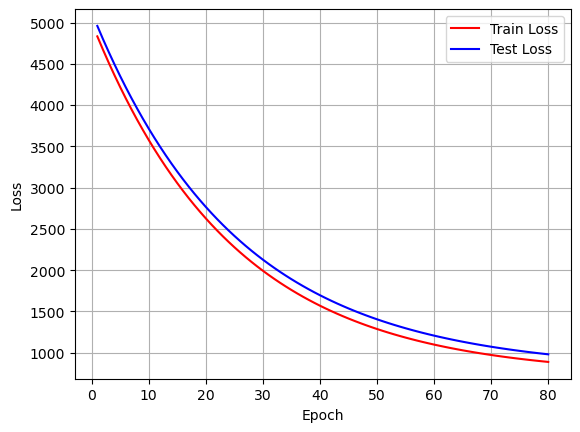

In [26]:
fig = plt.figure()
xv = np.arange(1, n_epoch + 1, 1)
plt.plot(xv, train_loss, 'r', label = "Train Loss")
plt.plot(xv, test_loss, 'b', label = "Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()